# <center>Practice 02. Exploratory Data Analysis, Feature Engineering, and Data Cleaning</center>
## <center>Part 01. Разведочный анализ данных – Exploratory Data Analysis (EDA)</center>

Рассмотрим датасет пассажиров "Титаника", который можно скачать [тут](https://www.kaggle.com/competitions/titanic/data).

Описание датасета:
- **PassengerId** ––– id пассажира, можно взять за индекс
- **Survived** (целевой признак) ––– выжил ли пассажир (0 = Нет, 1 = Да);
- **Pclass** ––– класс билета (1 = 1st, 2 = 2nd, 3 = 3rd);
- **Sex** ––– пол (female или male)	
- **Age** ––– возраст в годах
- **SibSp** –––	количество братьев, сестёр (в том числе сводных) и супругов на борту	
- **Parch**	–––	количество детей и родителей на борту
- **Ticket** ––– номер билета	
- **Fare** ––– стоимость проезда пассажира	
- **Cabin** ––– номер каюты	
- **Embarked** ––– порт посадки пассажира (C = Cherbourg, Q = Queenstown, S = Southampton).

Необходимо решить задачу классификации и научиться предсказывать целовой признак **Survived** выживет ли пассажир по его нецелевым признакам.

Сперва подключим необходимые библиотеки.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку.

In [2]:
df = pd.read_csv('../../data/titanic/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Проверяем общее количество пропущенных значений.

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Признаки **Age, Cabin** и **Embarked** имеют пропущенные значения, особенно признак **Cabin**. Будем это учитывать в дальнейшем при очистке данных.

Также сразу появляется интерес посмотреть на статистику по целевому признаку. А именно, сколько каких значений он принимает. Для этого воспользуемся функцией <code>value_counts()</code>.

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Анализ данных, особенно достаточно сложный, легче воспринимается визуально. Поэтому часто будем прибегать к средствам визуализации. Например, удобно использовать функцию <code>countplot()</code> библиотеки seaborn.

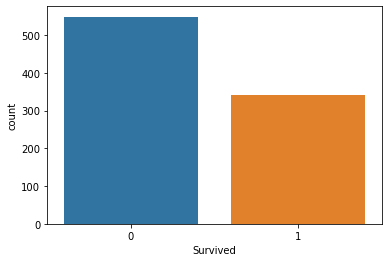

In [6]:
sns.countplot('Survived', data=df);  # можно не писать plt.show(), а точка с запятой убирает лишнюю информацию

Ну и конечно посмотрим каков был шанс выжить судя по данным из тестовой выборки.

In [7]:
df['Survived'].mean()

0.3838

Из пассажиров обучающей выборки чуть больше **38%** смогли уцелеть. Далее проведём первичный анализ признаков по отдельности и попарно. Особенно интересуют зависимости целевого признака от нецелевых. 

## Первичный анализ признаков

### Категориальный признак Sex

In [8]:
df.groupby(['Sex', 'Survived'])['Survived'].count()  # оба признака категориальные, группируем и считаем колличество

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

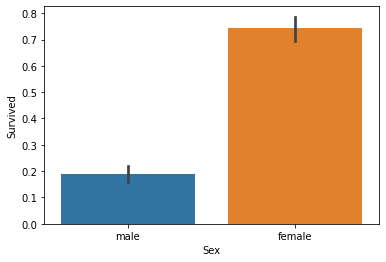

In [9]:
sns.barplot(x = "Sex", y = "Survived", data = df);

Выжило около **75%** женщин и всего около **20%** мужчин.

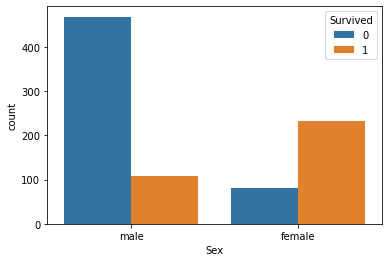

In [10]:
sns.countplot('Sex',hue='Survived',data=df);

Несмотря на то, что больншинство пассажиров были мужчинами, выжило намного больше женщин. Признак **Sex** кажется очень важным для этой задачи и имеющим сильную зависимость с целевым признаком. Проанализируем другие признаки.

## Порядковый признак Pclass

In [11]:
pd.crosstab(df['Pclass'], df['Survived'], margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


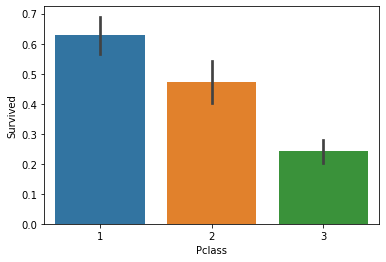

In [12]:
sns.barplot(x = "Pclass", y = "Survived", data = df);

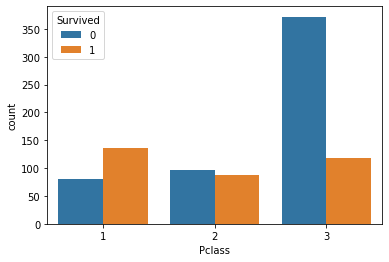

In [13]:
sns.countplot('Pclass', hue='Survived', data=df);

Несмотря на подавляющее большинство пассажиров третьего класса, в основном выжили пассажиры из классов повыше. Видимо пассажиры из первого класса были в приоритете при эвакуации/спасении. Признак **Pclass** возможно тоже важен для предсказания выживания.

Посмотрим на комбинацию рассмотренных признаков **Sex** и **Pclass** и связь с целевым признаком.

In [14]:
pd.crosstab([df['Sex'], df['Survived']], df['Pclass'], margins=True).style.background_gradient()

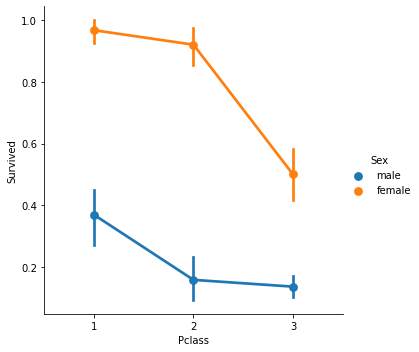

In [15]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df);

Женщины из 1го класса спаслись почти полностью (более **95%** из них выжили). Только 3 женщины из 94 в 1ом классе погибли. Видимо спасали в первую очередь женщин из первого класса, мужчины же, даже из первого класса, имеют низкий процент выживших.

В целом, отметим возмужную важность признака **Pclass**.

## Количественный признак Age


In [16]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

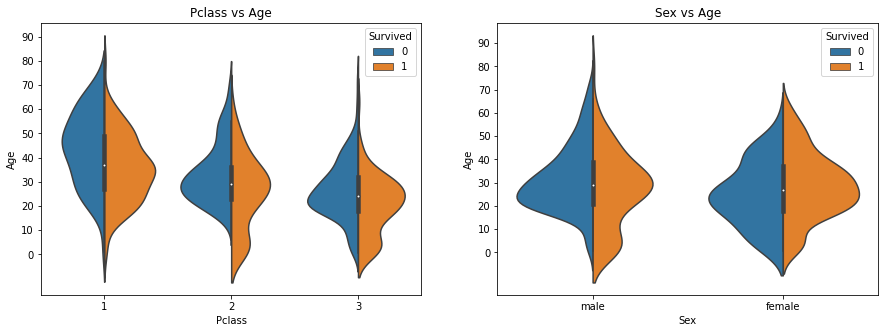

In [17]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot("Pclass", "Age", hue="Survived", data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass vs Age')
ax[0].set_yticks(range(0, 100, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=df, split=True, ax=ax[1])
ax[1].set_title('Sex vs Age')
ax[1].set_yticks(range(0, 100, 10))
plt.show()

- Независимо от класса, маленькие дети имеют хорошую долю выживших
- У мужчин доля выживших меньше, особенно у пожилых

Мы отмечали, что признак **Age** имеет 177 пропущенных значений. Данных очень мало, поэтому попытаемся не выкидывать эти наблюдения, а заполнить пропущенные значения чем то осмысленным.

Заменить пропущенные возраста просто на средний возраст пассажиров будет не очень хорошим решением.

Не поверите, но определить возраст точнее поможет имя, признак **Name**. Как? Этот признак содержит обращения Mr., Mrs., Dr. и т.д.

In [18]:
df['Mr_Mrs'] = 0
for i in df:
    df['Mr_Mrs']=df['Name'].str.extract('([A-Za-z]+)\.') #lets extract the Salutations
pd.crosstab(df['Sex'],df['Mr_Mrs']).style.background_gradient()

Mr_Mrs,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Упростим и объединим некоторые обращения.

In [19]:
df['Mr_Mrs'].\
replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],\
        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)
pd.crosstab(df['Sex'],df['Mr_Mrs']).style.background_gradient()

Mr_Mrs,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [20]:
df.loc[(df['Mr_Mrs'] == 'Mr') & (df['Sex'] == 'female'), "Mr_Mrs"] = 'Mrs' # исправляем обращение к доктору женщине
pd.crosstab(df['Sex'],df['Mr_Mrs']).style.background_gradient()

Mr_Mrs,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,128,0
male,40,0,528,0,9


In [21]:
df.groupby('Mr_Mrs')['Age'].mean()  # теперь более точно сможем задать средние возраста по группам пассажиров

Mr_Mrs
Master     4.574167
Miss      21.860000
Mr        32.699755
Mrs       36.099099
Other     45.888889
Name: Age, dtype: float64

In [22]:
df.loc[(df['Age'].isnull()) & (df['Mr_Mrs'] == 'Master'), 'Age'] = 5
df.loc[(df['Age'].isnull()) & (df['Mr_Mrs'] == 'Miss'), 'Age'] = 22
df.loc[(df['Age'].isnull()) & (df['Mr_Mrs'] == 'Mr'), 'Age'] = 33
df.loc[(df['Age'].isnull()) & (df['Mr_Mrs'] == 'Mrs'), 'Age'] = 36
df.loc[(df['Age'].isnull()) & (df['Mr_Mrs'] == 'Other'), 'Age'] = 46
df['Age'].isnull().any()  # избавились от пропусков в данных о возрасте

False

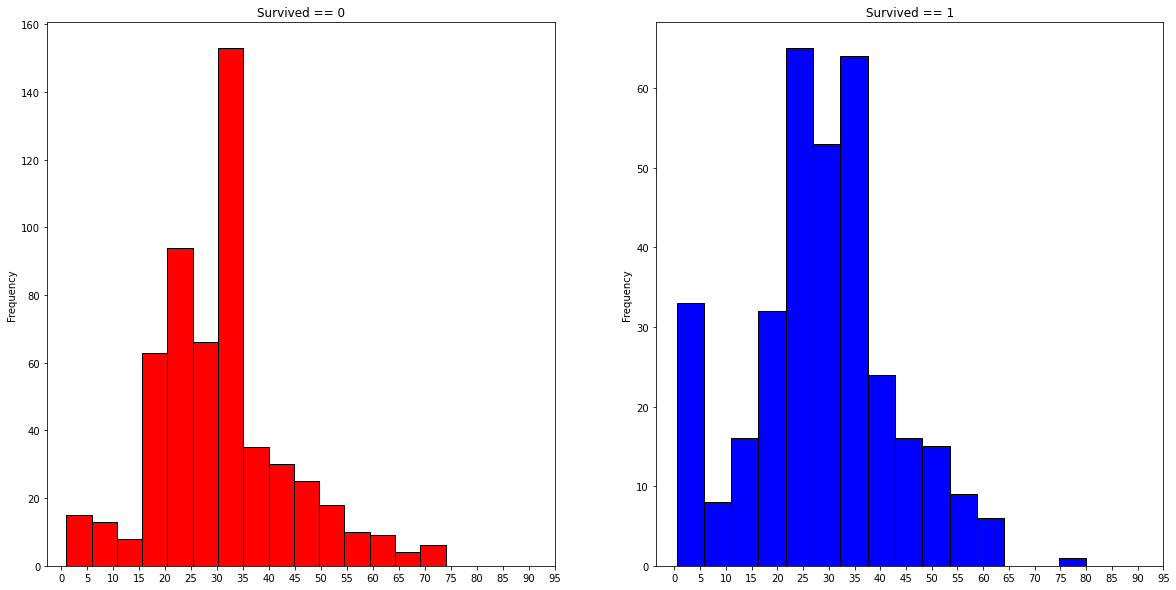

In [23]:
_, ax = plt.subplots(1, 2, figsize=(20, 10))
df[df['Survived'] == 0]['Age'].plot.hist(ax=ax[0], edgecolor='black', color='red', bins=15)
ax[0].set_title('Survived == 0')
x1 = list(range(0, 100, 5))
ax[0].set_xticks(x1)
df[df['Survived'] == 1].Age.plot.hist(ax=ax[1],color='blue',edgecolor='black', bins=15)
ax[1].set_title('Survived == 1')
x2 = list(range(0, 100, 5))
ax[1].set_xticks(x2)
plt.show()

- Не только женщин, но и самых маленьких детей спасили в первую очередь

- Самый пожилой 80-летний пассажир также был спасён

- Больше всего погибло молодых людей около 30 лет

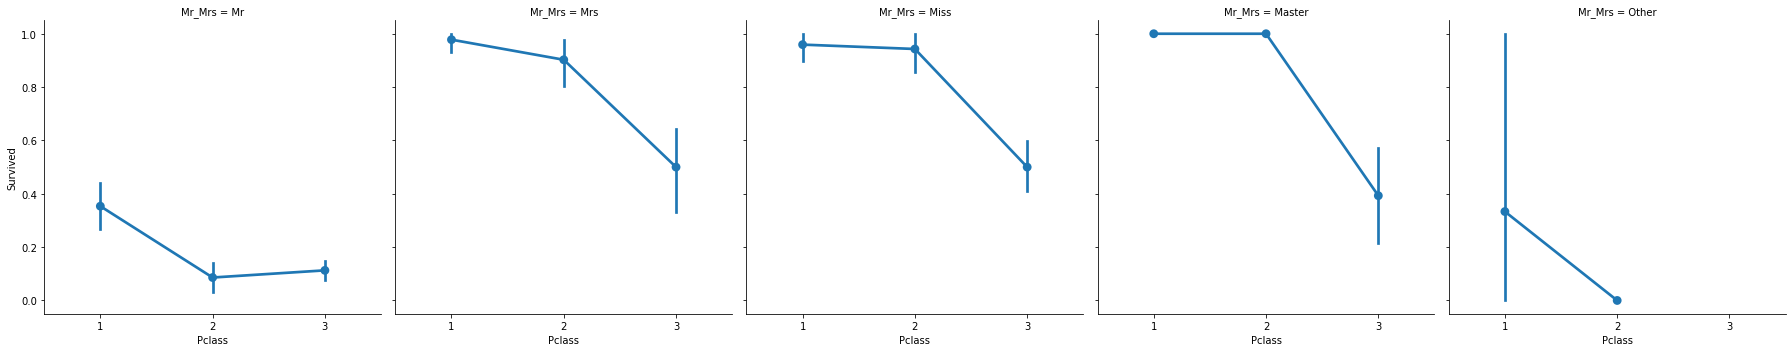

In [24]:
sns.factorplot('Pclass', 'Survived', col='Mr_Mrs', data=df);

Независимо от класса пассажиров, в первую очередь спасали женщин и детей.

## Категориальный признак Embarked

In [25]:
pd.crosstab([df['Embarked'], df['Pclass']], [df['Sex'], df['Survived']], margins=True).\
        style.background_gradient()

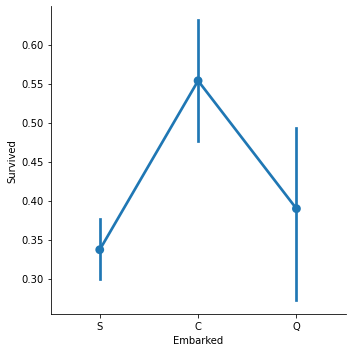

In [26]:
sns.factorplot('Embarked', 'Survived', data=df);

Есть различия шанса выжить для пассажиров с разными портами посадки.

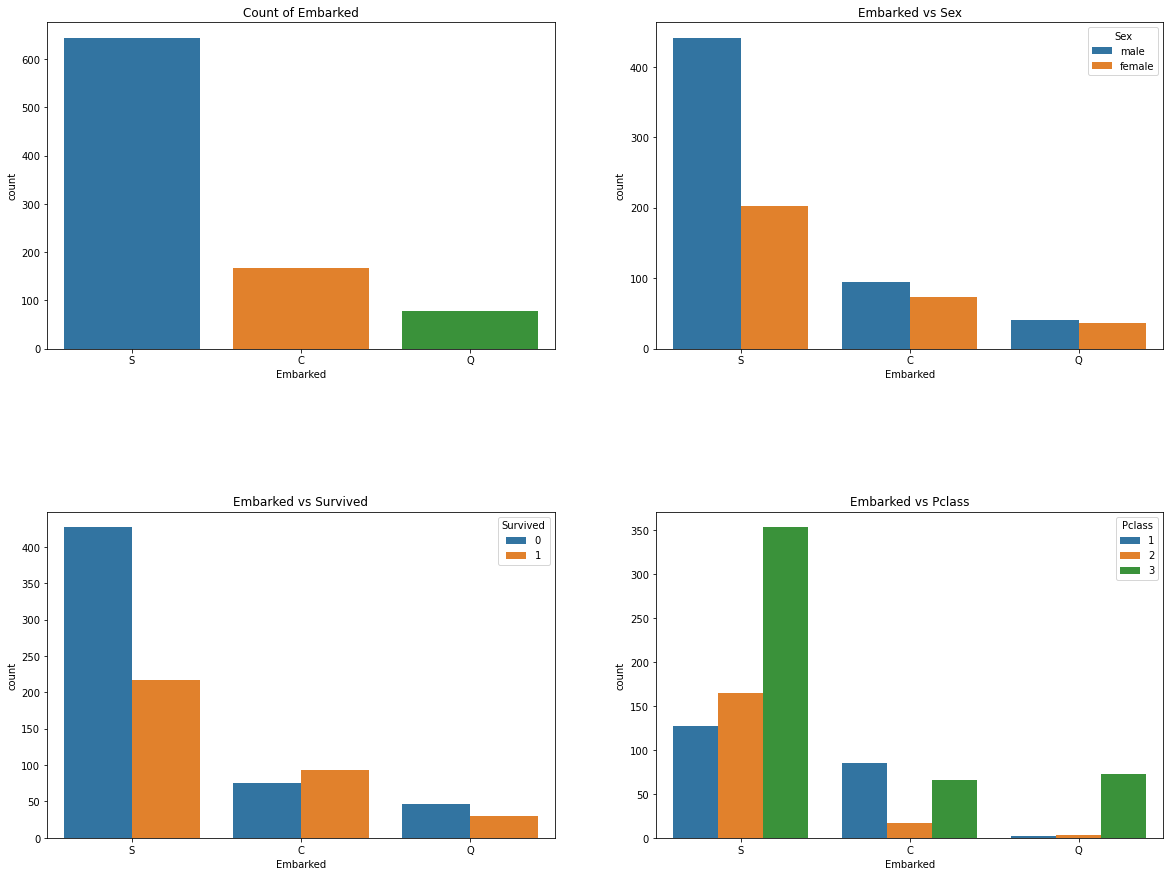

In [27]:
_, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df, ax=ax[0,0])
ax[0,0].set_title('Count of Embarked')
sns.countplot('Embarked', hue='Sex', data=df, ax=ax[0,1])
ax[0,1].set_title('Embarked vs Sex')
sns.countplot('Embarked', hue='Survived', data=df, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Самая большая посадка в порту S, преимущественно мужчин и в 3ий класс
- Кажется что те, кто сел в порту C более удачливые, вероятно из-за соотношения богатых к бедным и женщин к мужчинам

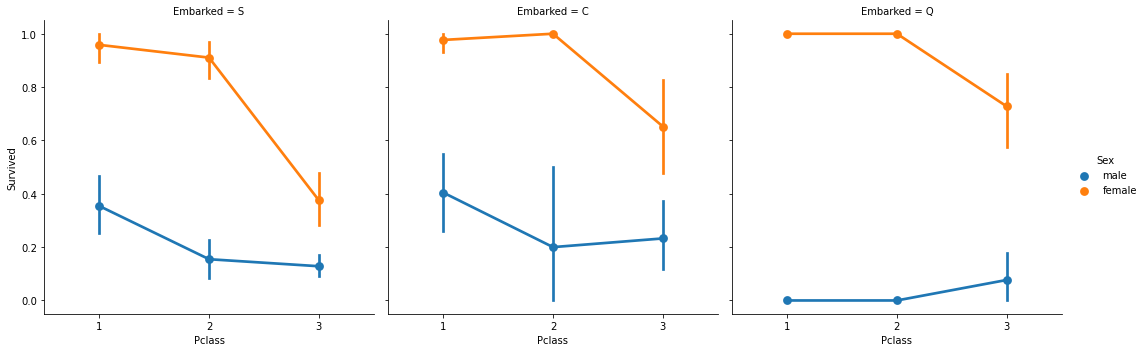

In [28]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=df);

- Женщины из 1го и 2го класса почти все выжили, не важно где сели.
- Для женщин наименьший шанс выжить, если они сели в порту S и они из 3го класса. Этот шанс сравним с шансом мужчин из 1го класса.
- Самая печальная картина для мужчин, если они сели в порту Q, так как почти все они пассажиры 3го класса.

Также помним про нулевые значения признака **Embarked**.

In [29]:
df['Embarked'].isnull().sum()

2

Всего два значения пропущены. Так как в большинстве случаем пассажиры сели в порту S, то с чистой совестью заполняем эти значения этим портом.

In [30]:
df['Embarked'].fillna('S', inplace=True)

In [31]:
df['Embarked'].isnull().any()  # избавились от пропущенных значений признака Embarked

False

## Дискретный признак SibSp
- Sibling = сводные/родные братья/сестры
- Spouse = муж/жена

In [32]:
pd.crosstab(df['SibSp'], df['Survived']).style.background_gradient()

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


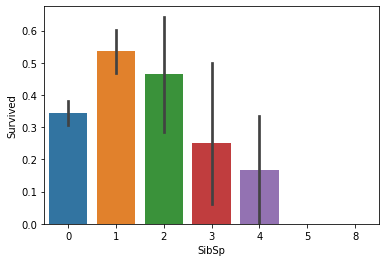

In [33]:
sns.barplot('SibSp', 'Survived', data=df);

In [34]:
pd.crosstab(df['SibSp'],df['Pclass']).style.background_gradient()

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- Кажется, что с ростом количества родных на борту сильно уменьшается шанс выжить начиная с 3 человек. Если на борту 5 или более родственников, то такие пассажиры точно погибали. Вероятно из-за попыток спасти семью, а не себя.
- Однако причной является признак Pclass. Последняя таблица показывает, что все большие семьи были из 3го класса.

## Дискретный признак Parch

In [35]:
pd.crosstab(df.Parch, df.Pclass).style.background_gradient()

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Опять же, большие семьи почти полностью из 3го класса.

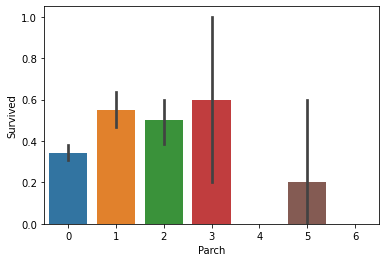

In [36]:
sns.barplot('Parch', 'Survived', data=df);

- Опять же, не большое количество родственников увеличивает шансы выжить
- Однако начиная с 4 шансы сильно уменьшаются

## Выводы:
- **Sex:** Скорее выживут женщины.
- **Pclass:** 1ый класс имеет хорошие шансы выжить (женщины почти 100%), женщины из 2го классов тоже. 3ий класс пострадал больше всех.
- **Age:** Дети около 5-10 лет имели хороший шанс выжить. Пассажиры окол 30-35 лет часто погибали.
- **Embarked:** Кажется, что пассажирам, севшим в порту C повезло больше.
- **Parch+SibSp:** Наличие 1-3 таких родственников показало хороший шанс выживания. Лучше, чем быть одному или в составе большой семьи, которая почти всегда из 3го класса.

## Корреляция признаков

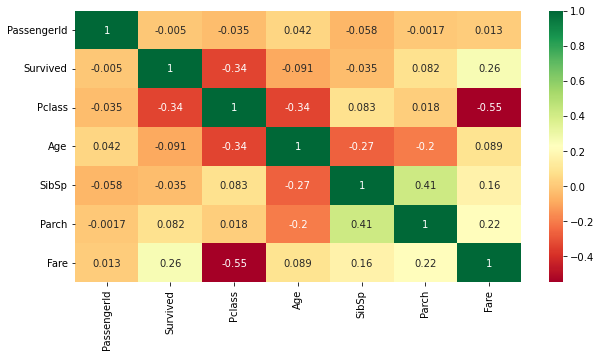

In [37]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Слишком большой корреляции нету, которая позволила бы сразу убрать из рассмотрения некоторые признаки, несущие в себе в основном избыточную информацию.
Разве что можно присмотреться к **Pclass vs Fare**, и **SibSp vs Parch**.

Но таким образом мы сравнили только количественные признаки.

Пока продолжим анализ со всеми признаками.

## <center> Part 02: Feature Engineering and Data Cleaning</center>

Далеко не всегда все признаки в данных важны или представляются в нужном виде. Поэтому после некоторого анализа данных и признаков часто нужно добавлять новые признаки и удалять неважные. Новые признаки могут быть основаны на некоторых наблюдениях в результате анализа данных, могут явно вычислятся из других признаков.

Например, мы добавили признак **Mr_Mrs**, который позволил нам дополнить пропущенные значения в возрасте.

Посмотрим какие полезные признаки ещё сможем создать, а какие существующие сможем привести к более удобному виду для дальнейшего обучения.

## Новый признак возрастные категории Age_category

У категориальных признаков есть свои преимущества по сравнению с количественными. Например, по категориальным признакам можно группировать.

Воспользуемся признаком **Age** и выделим во множестве его значений (от 0 до 80) категории (интервалы).

In [38]:
df['Age_category'] = 0  # заполняем сначала значения нового признака нулями
df.loc[df['Age'] <= 16, 'Age_category'] = 0  # далле разбиваем возраста на 5 категорий
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age_category'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age_category'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age_category'] = 3
df.loc[df['Age'] > 64, 'Age_category'] = 4
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr_Mrs,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


Ещё раз взглянем на корреляцию признаков. 

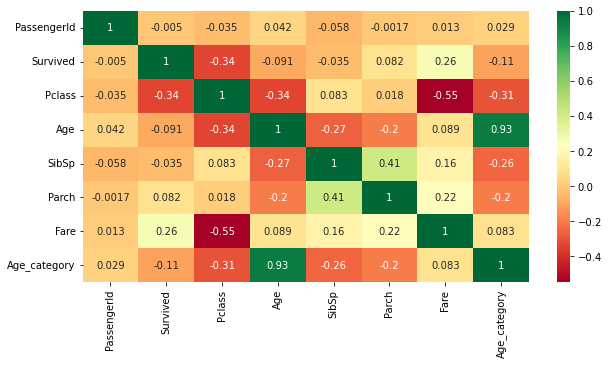

In [39]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [40]:
df['Age_category'].value_counts().to_frame().style.background_gradient(cmap='summer')  # пассажиров в категориях

,Age_category
1,382
2,325
0,104
3,69
4,11


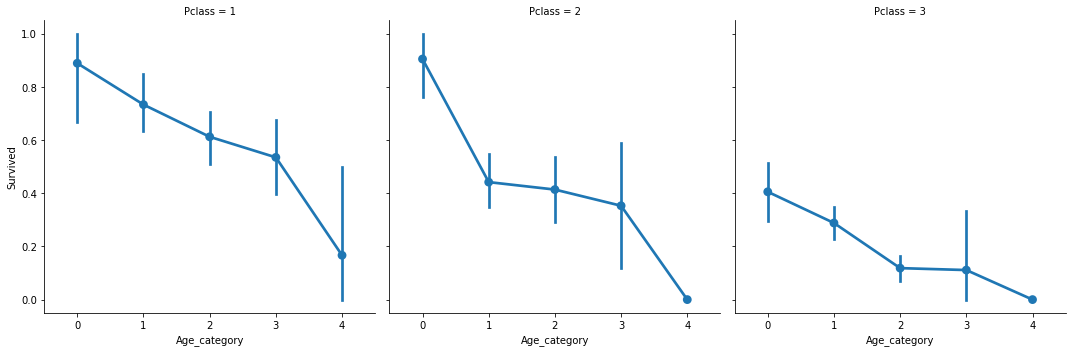

In [41]:
sns.factorplot('Age_category', 'Survived', data = df,col = 'Pclass')
plt.show()

Делаем вывод, что вероятность выжить снижалась с ростом возраста независимо от класса билета.

## Новые признаки размеров семей Family_Size и Alone
Такие признаки позволят нам разглядеть зависимости от размеров семей, которые спрятаны в **Parch** и **SibSp**.

In [42]:
df['Family_Size'] = 0
df['Family_Size'] = df['Parch'] + df['SibSp']  # размер семьи
df['Alone'] = 0
df.loc[df['Family_Size'] == 0, 'Alone'] = 1  # путешествовал ли пассажир один

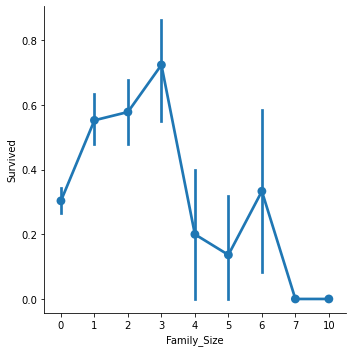

In [43]:
sns.factorplot('Family_Size', 'Survived', data=df);

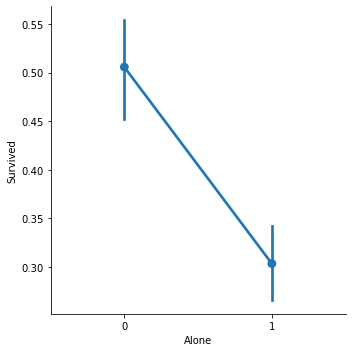

In [44]:
sns.factorplot(x='Alone', y='Survived', data=df);

Шансы вижить существенно меньше для тех, кто был один или с семьей размера от 4

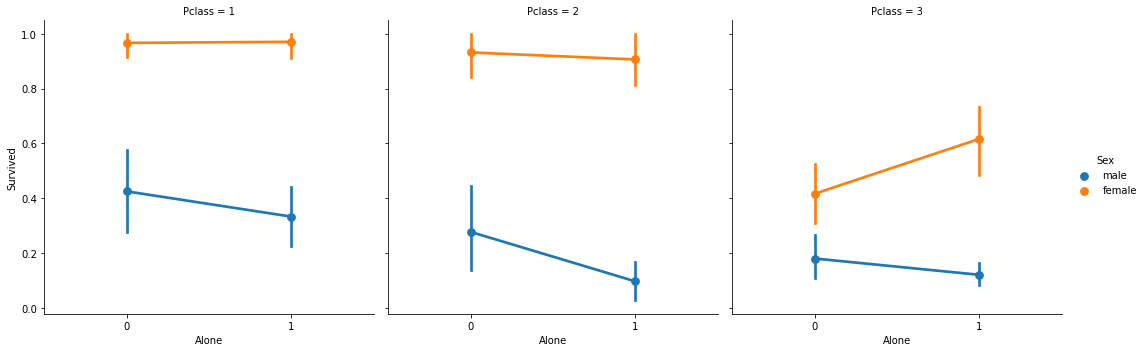

In [45]:
sns.factorplot('Alone', 'Survived', data=df, hue='Sex', col='Pclass');

Быть одному - плохо, неззависимо от пола или класса билета. Кроме женщин в 3ем классе, где просто было больше женщин, путешествующих одних.

## Новый признак категорий стоимости билета Fare

Разобъём область значений на интервалы.

In [46]:
df['Fare_category'] = pd.qcut(df['Fare'], 5)
df.groupby(['Fare_category'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_category,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


Шансы выжить повышаются с ростом стоимости билета. Тут конечно и связь с классом билета.

In [47]:
df['Fare_category'] = 0
df.loc[df['Fare'] <= 7.91, 'Fare_category'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare_category'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare_category'] = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 513), 'Fare_category'] = 3

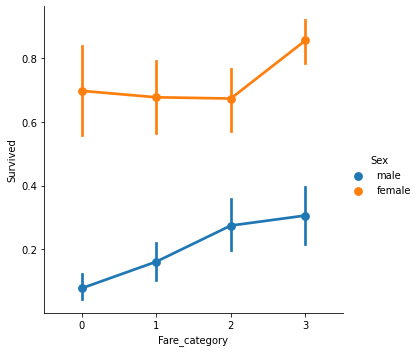

In [48]:
sns.factorplot('Fare_category', 'Survived', data=df, hue='Sex');

Этот признак может быть полезен в дальнейшем процессе обучения.

## Трансформация строк в числа

Подготавливаем данные, приводим к удобному для обучению формату.

In [49]:
df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
df['Mr_Mrs'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

## Удаление ненужных признаков

**Name** –– неважно, категории обращений мистер и тд уже сделали.

**Age** –– вместо него будем использовать категории возрастов **Age_category**.

**Ticket** –– неважно.

**SibSp** и **Parch** –– вместо них **Family_Size** и **Alone**

**Fare** –– вместо него **Fare_category**.

**Cabin** –– много пропущенных значений, есть повторяющиеся, не понятно что делать с этим признаком.

**PassengerId** –– просто индекс.

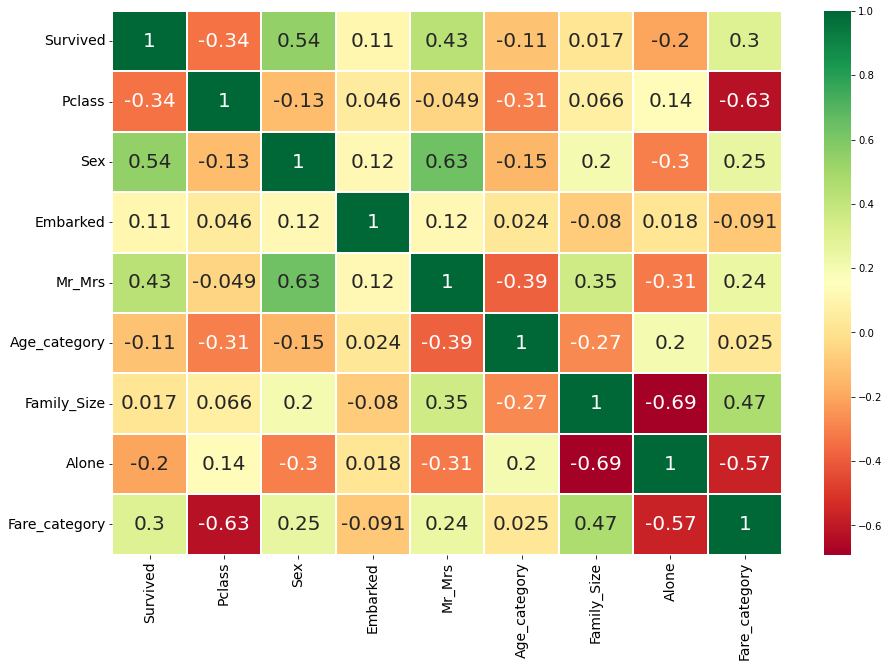

In [50]:
df.drop(['Name', 'Age', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Тут можно исследовать полученные положительные и отрицательные корреляции между признаками. Далее уже необходимо выбирать семейства моделей машинного обучения для решения задачи классификации.